# Análise de Dados - Estatística Descritiva, Normalização, Distribuições Amostrais e Intervalo de Confiança

In [12]:

# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as stats

# Carregar o dataset com delimitador ;
file_path = 'CAPACIDADE_GERACAO.csv'
df = pd.read_csv(file_path, delimiter=';')

# Parametrização das colunas 'nom_estado', 'nom_agenteproprietario', 'nom_combustivel' e 'nom_tipousina'
label_encoder = LabelEncoder()
df['nom_estado'] = label_encoder.fit_transform(df['nom_estado'])
df['nom_agenteproprietario'] = label_encoder.fit_transform(df['nom_agenteproprietario'])
df['nom_combustivel'] = label_encoder.fit_transform(df['nom_combustivel'])
df['nom_tipousina'] = label_encoder.fit_transform(df['nom_tipousina'])
df['id_subsistema'] = label_encoder.fit_transform(df['id_subsistema'])

df.head()


,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_modalidadeoperacao,nom_agenteproprietario,nom_tipousina,nom_usina,ceg,nom_unidadegeradora,cod_equipamento,num_unidadegeradora,nom_combustivel,dat_entradateste,dat_entradaoperacao,dat_desativacao,val_potenciaefetiva
0,1,0,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 1 AL,ALUXG-0UG1,1,5,1997-08-22,1997-08-22,NaN,527.0
1,1,0,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 2 AL,ALUXG-0UG2,2,5,1996-12-20,1996-12-20,NaN,527.0
2,1,0,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 3 AL,ALUXG-0UG3,3,5,1996-07-31,1996-07-31,NaN,527.0
3,1,0,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 4 AL,ALUXG-0UG4,4,5,1995-10-26,1995-10-26,NaN,527.0
4,1,0,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 5 AL,ALUXG-0UG5,5,5,1995-01-31,1995-01-31,NaN,527.0


## Estatística Descritiva

In [ ]:

# Box plot para 'val_potenciaefetiva'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['val_potenciaefetiva'])
plt.title('Box plot para val_potenciaefetiva')
plt.show()

# Box plot para 'nom_estado'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['nom_estado'])
plt.title('Box plot para nom_estado')
plt.show()


In [ ]:

# Histograma
df.hist(figsize=(10, 6), bins=30)
plt.suptitle('Histogramas das variáveis')
plt.show()


In [ ]:

# Scatter plot
sns.pairplot(df)
plt.suptitle('Scatter plots entre as variáveis', y=1.02)
plt.show()


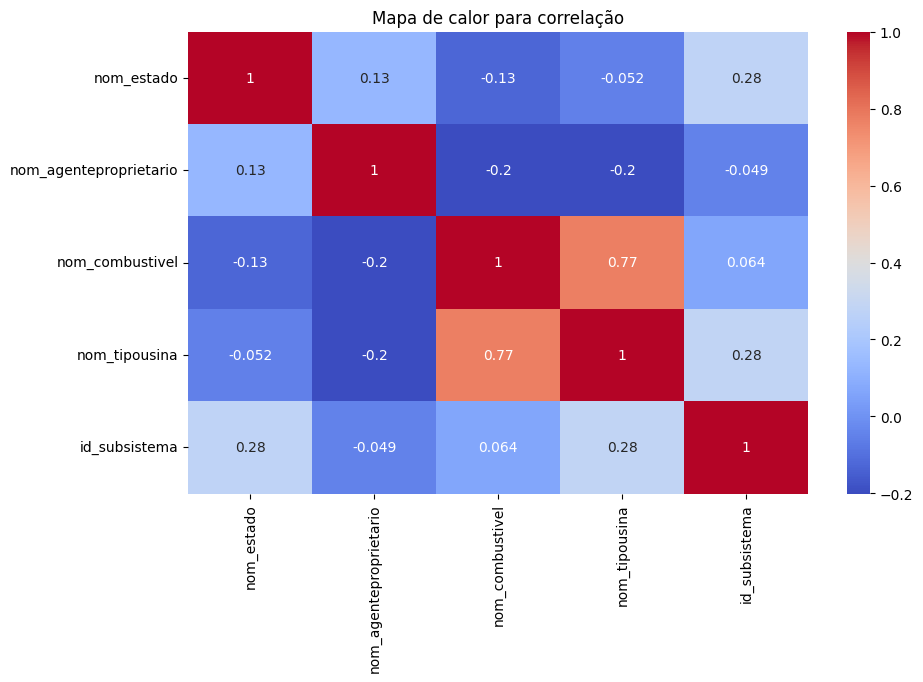

In [19]:

# Mapa de calor para correlação
plt.figure(figsize=(10, 6))
correlation_matrix = df[['nom_estado', 'nom_agenteproprietario', 'nom_combustivel', 'nom_tipousina', 'id_subsistema']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor para correlação')
plt.show()


## Normalização

In [20]:

# Selecionar duas colunas para normalizar
cols_to_normalize = ['val_potenciaefetiva', 'nom_estado']  # Exemplo: 'val_potenciaefetiva' e 'nom_estado'
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Exibir o dataframe normalizado
df_normalized.head()


,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_modalidadeoperacao,nom_agenteproprietario,nom_tipousina,nom_usina,ceg,nom_unidadegeradora,cod_equipamento,num_unidadegeradora,nom_combustivel,dat_entradateste,dat_entradaoperacao,dat_desativacao,val_potenciaefetiva
0,1,0,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 1 AL,ALUXG-0UG1,1,5,1997-08-22,1997-08-22,NaN,5.79152
1,1,0,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 2 AL,ALUXG-0UG2,2,5,1996-12-20,1996-12-20,NaN,5.79152
2,1,0,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 3 AL,ALUXG-0UG3,3,5,1996-07-31,1996-07-31,NaN,5.79152
3,1,0,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 4 AL,ALUXG-0UG4,4,5,1995-10-26,1995-10-26,NaN,5.79152
4,1,0,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 5 AL,ALUXG-0UG5,5,5,1995-01-31,1995-01-31,NaN,5.79152


# Distribuição Normal

In [25]:
df.describe()

,id_subsistema,nom_subsistema,nom_estado,nom_agenteproprietario,nom_tipousina,nom_combustivel,val_potenciaefetiva
count,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000
mean,1.920635,1.144465,12.863171,609.616034,2.637131,4.621258,38.348984
std,1.405637,1.508892,7.142861,371.045057,1.659685,3.691289,84.382017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325000
25%,1.000000,0.000000,5.000000,286.000000,1.000000,2.000000,10.000000
50%,1.000000,0.000000,14.000000,596.000000,2.000000,3.000000,15.000000
75%,4.000000,3.000000,19.000000,887.000000,5.000000,5.000000,25.200000
max,4.000000,4.000000,27.000000,1317.000000,5.000000,12.000000,1350.000000


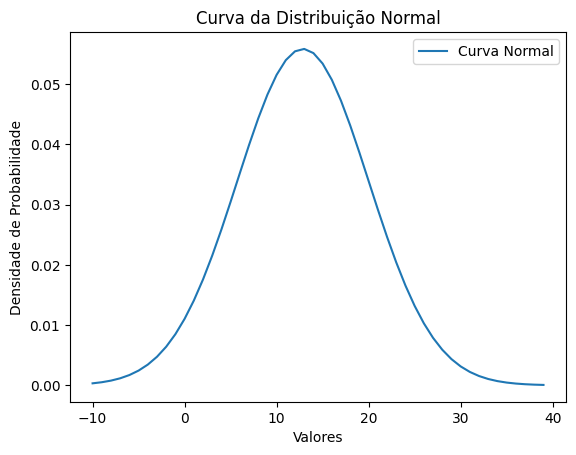

In [33]:
x = np.arange(-10, 40, 1) #a função arange define os limites da variável e o incremento

mu = 12.863171   # Média
sigma = 7.142861	# Desvio padrão

# Função densidade de probabilidade da distribuição normal
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Plotando a curva normal
plt.plot(x, y, label="Curva Normal")
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.title("Curva da Distribuição Normal")
plt.legend()
plt.show()

In [24]:
#importar a bibliotaca StandardScaler para aplicar a normalização (z=(valor - média)/desvio padão)
#Média = 0 e o Variância = 1

scaler = StandardScaler() #o módulo standard.scaler padroniza os dados
ajuste = scaler.fit(df) #determina a média e o desvio padrão
normal = scaler.transform(df) #aplicar a normal padrão z=(valor - média)/desvio padrão

normalpadrao = pd.DataFrame(normal)
normalpadrao.head()

ValueError: could not convert string to float: 'AL'

## Distribuições Amostrais

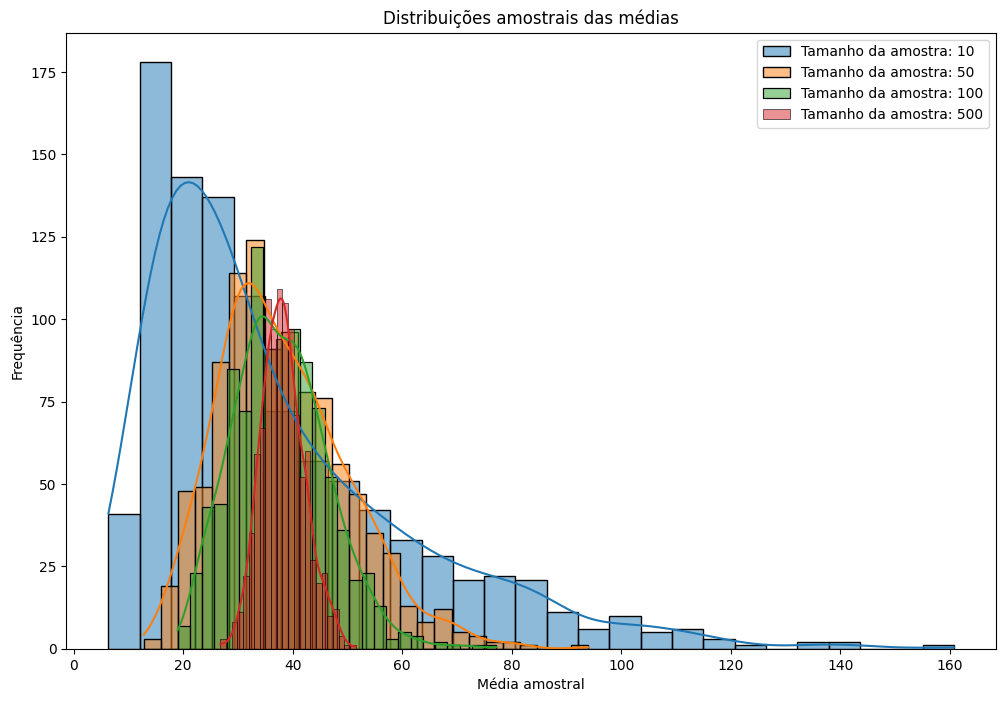

In [21]:

# Coluna 'val_potenciaefetiva'
column = 'val_potenciaefetiva'
sample_sizes = [10, 50, 100, 500]
sample_means = {size: [] for size in sample_sizes}

for size in sample_sizes:
    for _ in range(1000):
        sample = df[column].sample(size, replace=True)
        sample_means[size].append(sample.mean())

# Evolução das distribuiçõees amostrais das médias
plt.figure(figsize=(12, 8))
for size in sample_sizes:
    sns.histplot(sample_means[size], kde=True, label=f'Tamanho da amostra: {size}')
plt.title('Distribuições amostrais das médias')
plt.xlabel('Média amostral')
plt.ylabel('Frequência')
plt.legend()
plt.show()


## Intervalo de Confiança

In [22]:

# Coluna 'val_potenciaefetiva'
data = df['val_potenciaefetiva']
mean = np.mean(data)
sem = stats.sem(data)
confidence_intervals = {
    90: stats.t.interval(0.90, len(data)-1, loc=mean, scale=sem),
    95: stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
}

# Exibir os Intervalos de Confiança
confidence_intervals


{90: (36.38121476674265, 40.31675354082817),
 95: (36.00410846508022, 40.693859842490596)}